In [124]:
import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [125]:
ar_df = pd.read_csv('csv/air_reserve.csv')
asi_df = pd.read_csv('csv/air_store_info.csv')
avd_df = pd.read_csv('csv/air_visit_data.csv')
hr_df = pd.read_csv('csv/hpg_reserve.csv')
hsi_df = pd.read_csv('csv/hpg_store_info.csv')
sir_df = pd.read_csv('csv/store_id_relation.csv')
sample_df = pd.read_csv('csv/sample_submission.csv')
di_df = pd.read_csv('csv/date_info.csv')

In [157]:
ar_df.head()
ar_df.shape

(92378, 4)

In [149]:
asi_df.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [150]:
avd_df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [158]:
hr_df.head()
hr_df.shape

(2000320, 4)

In [152]:
hsi_df.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [153]:
sir_df.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [154]:
sample_df.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [155]:
di_df.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [ ]:
# longitude-latitude cluster
xh = hsi_df['longitude']
yh = hsi_df['latitude']
plt.scatter(xh,yh)
plt.show()

In [ ]:
xa = asi_df['longitude']
ya = asi_df['latitude']
plt.scatter(xa,ya)
plt.show()

In [ ]:
# location counting
asi_location_df = pd.DataFrame(asi_df.air_area_name.str.split(' ', 2).tolist(), columns = ['province','city', 'street'])
asi_df = asi_df.join(asi_location_df)
asi_df.drop(['air_area_name'], axis=1, inplace=True)

In [ ]:
hpg_location_df = pd.DataFrame(hsi_df.hpg_area_name.str.split(' ', 2).tolist(), columns = ['province','city', 'street'])
hsi_df = hsi_df.join(hpg_location_df)
hsi_df.drop(['hpg_area_name'], axis=1, inplace=True)

In [ ]:
province_count = pd.concat([asi_df['province'], hsi_df['province']]).value_counts().size # 13
city_count = pd.concat([asi_df['city'], hsi_df['city']]).value_counts().size # 85
street_count = pd.concat([asi_df['street'], hsi_df['street']]).value_counts().size # 191
location_total = province_count + city_count + street_count # 289
print('location_total:', location_total)

In [131]:
# merge air_store_info & hpg_store_info dataset
link_df = pd.merge(asi_df, sir_df, on='air_store_id', how='outer')
rrvf_df = pd.merge(link_df, hsi_df, on='hpg_store_id', how='outer')
rrvf_df = rrvf_df.fillna(0)

In [132]:
# process latitude & longitude overlapping
count_latitude_x = (rrvf_df['latitude_x'] > 0) + 0
count_latitude_y = (rrvf_df['latitude_y'] > 0) + 0
count_latitude = count_latitude_x + count_latitude_y
mean_latitude = (rrvf_df['latitude_x'] + rrvf_df['latitude_y']) / count_latitude

count_longitude_x = (rrvf_df['longitude_x'] > 0) + 0
count_longitude_y = (rrvf_df['longitude_y'] > 0) + 0
count_longitude = count_longitude_x + count_longitude_y
mean_longitude = (rrvf_df['longitude_x'] + rrvf_df['longitude_y']) / count_longitude

rrvf_df.drop(['latitude_x', 'latitude_y', 'longitude_x', 'longitude_y'], axis=1, inplace=True)

In [133]:
ll_df = pd.DataFrame({'latitude': mean_latitude, 'longitude': mean_longitude})
rrvf_df = rrvf_df.join(ll_df)

In [ ]:
# counting continuous holiday duration
record_arr = [['2016-01-01', 0]]
record_posi = 0
recording = True
for index, row in di_df.iterrows():
    if recording and row['holiday_flg'] is 1:
        record_arr[record_posi][1] += 1
    elif not recording and row['holiday_flg'] is 1:
        record_posi += 1
        record_arr.append([row['calendar_date'], 1])
        recording = True
    elif recording and row['holiday_flg'] is not 1:
        recording = False
    else:
        pass
record_arr 

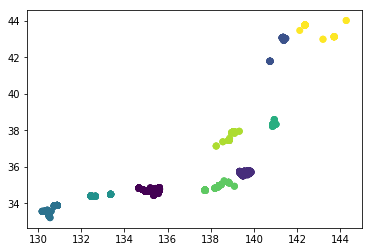

In [156]:
# cluster
X = rrvf_df[['latitude', 'longitude']].values
kmeans = KMeans(n_clusters=9, random_state=42)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 1], X[:, 0], c=y_pred)
plt.show()

In [134]:
# constrcut hpg-air genre map
genre = rrvf_df[['air_genre_name', 'hpg_genre_name']]
union_genre = genre[genre['air_genre_name'] != 0][genre['hpg_genre_name'] != 0]
group_genre = union_genre.groupby(['hpg_genre_name','air_genre_name']).size()
genre_map = []
for hpg_genre in group_genre.index.levels[0]:
    target_air_genre = group_genre[hpg_genre].argmax()
    if hpg_genre == 'Italian':
        target_air_genre = 'Italian/French'
    genre_map.append([hpg_genre, target_air_genre])
genre_map = np.array(genre_map)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [135]:
# process genre
genre = []
for index, row in rrvf_df.iterrows():
    air_genre = row['air_genre_name']
    hpg_genre = row['hpg_genre_name']
    if air_genre != 0:
        genre.append(air_genre)
    elif air_genre == 0 and hpg_genre != 0:
        target_posi = np.argwhere(genre_map == hpg_genre)
        if target_posi.size != 0:
            genre_name = genre_map[target_posi[0][0], 1]
            genre.append(genre_name)
        else:
            genre.append(hpg_genre)
    else:
        pass

In [136]:
genre_df = pd.DataFrame(genre, columns=['genre'])
rrvf_df = rrvf_df.join(genre_df)
rrvf_df.drop(['air_genre_name', 'hpg_genre_name'], axis=1, inplace=True)
rrvf_df.head()

,air_store_id,air_area_name,hpg_store_id,hpg_area_name,latitude,longitude,genre
0,air_0f0cdeee6c9bf3d7,Hyōgo-ken Kōbe-shi Kumoidōri,0,0,34.695124,135.197852,Italian/French
1,air_fee8dcf4d619598e,Hyōgo-ken Kōbe-shi Kumoidōri,0,0,34.695124,135.197852,Italian/French
2,air_a17f0778617c76e2,Hyōgo-ken Kōbe-shi Kumoidōri,0,0,34.695124,135.197852,Italian/French
3,air_83db5aff8f50478e,Tōkyō-to Minato-ku Shibakōen,0,0,35.658068,139.751599,Italian/French
4,air_99c3eae84130c1cb,Tōkyō-to Minato-ku Shibakōen,0,0,35.658068,139.751599,Italian/French


In [141]:
# process area_name
area_name = []
for index, row in rrvf_df.iterrows():
    air_area_name = row['air_area_name']
    hpg_area_name = row['hpg_area_name']
    if air_area_name != 0:
        area_name.append(air_area_name)
    elif air_area_name == 0 and hpg_area_name != 0:
        area_name.append(hpg_area_name)
    else:
        print('?????????????????????')

In [143]:
area_name_df = pd.DataFrame(area_name, columns=['area_name'])
rrvf_df = rrvf_df.join(area_name_df)
rrvf_df.drop(['air_area_name', 'hpg_area_name'], axis=1, inplace=True)
rrvf_df.head()

,air_store_id,hpg_store_id,latitude,longitude,genre,area_name
0,air_0f0cdeee6c9bf3d7,0,34.695124,135.197852,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
1,air_fee8dcf4d619598e,0,34.695124,135.197852,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
2,air_a17f0778617c76e2,0,34.695124,135.197852,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri
3,air_83db5aff8f50478e,0,35.658068,139.751599,Italian/French,Tōkyō-to Minato-ku Shibakōen
4,air_99c3eae84130c1cb,0,35.658068,139.751599,Italian/French,Tōkyō-to Minato-ku Shibakōen
